
### 生成有向图数据

In [1]:
import os
import json
import time
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
random.seed(9)


node_num = 10  # 网页节点个数
edge_num = node_num * 10  # 边的个数，默认按平均每个网页10条边设置
max_selfcycle = int(node_num * 0.2) # 限制自环的数量
cur_selfcycle = 0
save_dir = f'./data/n{node_num}'
os.makedirs(save_dir, exist_ok=True)

node_pairs = []
Graph = nx.DiGraph()
t1 = time.time()
Graph.add_nodes_from(range(0, node_num))
for i in range(edge_num):
    j = random.randint(0, node_num-1)  
    k = random.randint(0, node_num-1)

    # 限制自环数量
    if j == k:
        cur_selfcycle += 1
        if cur_selfcycle > max_selfcycle:
            continue
       
    Graph.add_edge(k, j)
    node_pairs.append((k, j))

# 消除重边
node_pairs = list(set(node_pairs))

# 边排序
node_pairs.sort(key=lambda x:x[0])
print("create graph time:", time.time()-t1)
# 绘制（非常耗时）
t2 = time.time()
# nx.draw(Graph, with_labels=True)
# plt.show()
# print("draw grath time:", time.time()-t2)

# 计算 pr
t3 = time.time()
pr = nx.pagerank(Graph, max_iter=100, alpha=0.85)
# print(pr)
print("cal pr time:", time.time()-t3)

with open(os.path.join(save_dir, f"edges_n{node_num}_e{len(node_pairs)}.txt"), "w") as f:
    f.write("{}\n".format(node_num))
    for edge in node_pairs:
        f.write("{} {}\n".format(edge[0], edge[1]))

with open(os.path.join(save_dir, f"pr_val_n{node_num}_e{len(node_pairs)}.json"), "w") as f:
    json.dump(pr, f)

print("total time is :", time.time() - t1)



create graph time: 0.000988006591796875
cal pr time: 0.07011294364929199
total time is : 0.07222604751586914


### 邻接表进行小数据验证

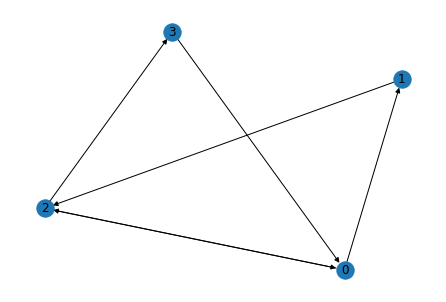

{0: 0.32456160227748454, 1: 0.17543839772251532, 2: 0.32456160227748454, 3: 0.17543839772251532}


In [4]:
# 视频中的 Demo 
import numpy as np
# 邻接矩阵（网页有向图），因为没有自环所以不存在 spider traps
A = np.array([[0, 0, 1, 1],
            [1, 0, 0, 0],
            [1, 1, 0, 0],
            [0, 0, 1, 0],
            ])

import networkx as nx
import matplotlib.pyplot as plt
Graph = nx.DiGraph()
Graph.add_nodes_from(range(0, 4))

for row in range(A.shape[0]):
    for col in range(A.shape[1]):
        if A[row, col] != 0:
            Graph.add_edge(col, row)

nx.draw(Graph, with_labels=True)
plt.show()

pr = nx.pagerank(Graph, max_iter=100, alpha=0.85)
print(pr)